In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from os import walk
from os.path import join
import sys
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

In [3]:
sys.getfilesystemencoding()

'utf-8'

In [4]:
EXAMPLE_FILE ='SpamData/01_Processing/practice_email.txt' 

In [5]:
stream = open(EXAMPLE_FILE , encoding = 'latin-1') 

In [6]:
message = stream.read()  

In [7]:
stream.close()  

In [8]:
print(message)

From exmh-workers-admin@redhat.com  Thu Aug 22 12:36:23 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id D03E543C36
	for <zzzz@localhost>; Thu, 22 Aug 2002 07:36:16 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 12:36:16 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MBYrZ04811 for
    <zzzz-exmh@spamassassin.taint.org>; Thu, 22 Aug 2002 12:34:53 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 8386540858; Thu, 22 Aug 2002
    07:35:02 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp

### Extracting body of a mail

In [9]:
stream = open(EXAMPLE_FILE , encoding = 'latin-1')            
is_body = False                                   
                                                    
                                                    
lines =[]                                            
for line in stream:
    
    if is_body:                              
        lines.append(line)                                   
    
    elif line == '\n':                                              
        is_body = True                                  
                                                                    
stream.close()                                         

In [10]:
email_body = lines         
email_body

['\n',
 'Dear Mr Still\n',
 '\n',
 'Good tidings to you and all your staff for the festive season ahead (Christmas).\n',
 'Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n',
 'But WAIT! You\'re probably thinking: "What makes him so special?"\n',
 'Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n',
 'You will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n',
 'I look forward to hearing from you.\n',
 '\n',
 'Best wishes\n'

In [11]:
print(email_body)

['\n', 'Dear Mr Still\n', '\n', 'Good tidings to you and all your staff for the festive season ahead (Christmas).\n', 'Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa\'s Grotto" in your store.\n', 'But WAIT! You\'re probably thinking: "What makes him so special?"\n', 'Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.\n', 'You will note also, from the enclosed sketch, that I have radically redesigned Santa\'s outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.\n', 'I look forward to hearing from you.\n', '\n', 'Best wishes\n', 'Robin C

In [12]:
print(''.join(email_body))        


Dear Mr Still

Good tidings to you and all your staff for the festive season ahead (Christmas).
Now to the crux of the matter-in-hand: I am a fully qualified Santa Claus and am wondering whether you might consider me to run my own "Santa's Grotto" in your store.
But WAIT! You're probably thinking: "What makes him so special?"
Well, first of all, I have made several changes to the characterisation of Father Christmas. Rather than greeting the children with shouts of "Ho, ho, ho!" I prefer to whisper the phrase "Dependence is not unfathomable in this cruel world we live in". In addition, my gifts are ALL hand-made, ranging from felt hoops to vanilla-pod holders.
You will note also, from the enclosed sketch, that I have radically redesigned Santa's outfit and have renamed my character "Lord Buckles". Would you be interested in employing me? I promise NEVER to let you down.
I look forward to hearing from you.

Best wishes
Robin Cooper
[Excerpt from the book: The Timewaster Letters by Robi

# start

In [13]:
for dirpath , dirnames , filenames in walk('SpamData'):        
    print('I am at .......', dirpath ,'\n')                

I am at ....... SpamData 

I am at ....... SpamData\01_Processing 

I am at ....... SpamData\01_Processing\spam_assassin_corpus 

I am at ....... SpamData\01_Processing\spam_assassin_corpus\easy_ham_1 

I am at ....... SpamData\01_Processing\spam_assassin_corpus\easy_ham_2 

I am at ....... SpamData\01_Processing\spam_assassin_corpus\spam_1 

I am at ....... SpamData\01_Processing\spam_assassin_corpus\spam_1\.ipynb_checkpoints 

I am at ....... SpamData\01_Processing\spam_assassin_corpus\spam_2 

I am at ....... SpamData\01_Processing\wordcloud_resources 

I am at ....... SpamData\02_Training 

I am at ....... SpamData\03_Testing 



In [14]:
for dirpath, dirnames, filenames in walk('SpamData'):
    
    print('I am at .....', dirnames , '\n') 

I am at ..... ['01_Processing', '02_Training', '03_Testing'] 

I am at ..... ['spam_assassin_corpus', 'wordcloud_resources'] 

I am at ..... ['easy_ham_1', 'easy_ham_2', 'spam_1', 'spam_2'] 

I am at ..... [] 

I am at ..... [] 

I am at ..... ['.ipynb_checkpoints'] 

I am at ..... [] 

I am at ..... [] 

I am at ..... [] 

I am at ..... [] 

I am at ..... [] 



In [15]:
for dirpath, dirnames, filenames in walk('SpamData'):
    
    print('I am at .....', filenames ,'\n')  

I am at ..... [] 

I am at ..... ['email-text-data.json', 'practice_email.json', 'practice_email.txt', 'word-by-id.csv'] 

I am at ..... [] 

I am at ..... ['00001 (2).7c53336b37003a9286aba55d2945844c', '00001.7c53336b37003a9286aba55d2945844c', '00002 (2).9c4069e25e1ef370c078db7ee85ff9ac', '00002.9c4069e25e1ef370c078db7ee85ff9ac', '00003.860e3c3cee1b42ead714c5c874fe25f7', '00004.864220c5b6930b209cc287c361c99af1', '00005.bf27cdeaf0b8c4647ecd61b1d09da613', '00006.253ea2f9a9cc36fa0b1129b04b806608', '00007.37a8af848caae585af4fe35779656d55', '00008.5891548d921601906337dcf1ed8543cb', '00009.371eca25b0169ce5cb4f71d3e07b9e2d', '00010.145d22c053c1a0c410242e46c01635b3', '00011.fbcde1b4833bdbaaf0ced723edd6e355', '00012.48a387bc38d1316a6f6b49e8c2e43a03', '00013.81c34741dbed59c6dde50777e27e7ea3', '00014.cb20e10b2bfcb8210a1c310798532a57', '00015.4d7026347ba7478c9db04c70913e68fd', '00016.ef397cef16f8041242e3b6560e168053', '00017.08ef2d89f14cf7e2a458b80697eb1837', '00018.6fee38026193b5adde4b56892a6f14

# How to categorised a spam & ham mail

## spam mail

In [16]:
SPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_1'

SPAM_CAT = 1

In [17]:
def email_body_generator(path):                                     
    
    for root , dirnames , filenames in walk(path):                  
        for file_name in filenames:                                
            filepath = join(root,file_name)                         
            print(filepath)

In [18]:
email_body_generator(SPAM_1_PATH)            

SpamData/01_Processing/spam_assassin_corpus/spam_1\00001.7848dde101aa985090474a91ec93fcf0
SpamData/01_Processing/spam_assassin_corpus/spam_1\00002.d94f1b97e48ed3b553b3508d116e6a09
SpamData/01_Processing/spam_assassin_corpus/spam_1\00003.2ee33bc6eacdb11f38d052c44819ba6c
SpamData/01_Processing/spam_assassin_corpus/spam_1\00004.eac8de8d759b7e74154f142194282724
SpamData/01_Processing/spam_assassin_corpus/spam_1\00005.57696a39d7d84318ce497886896bf90d
SpamData/01_Processing/spam_assassin_corpus/spam_1\00006.5ab5620d3d7c6c0db76234556a16f6c1
SpamData/01_Processing/spam_assassin_corpus/spam_1\00007.d8521faf753ff9ee989122f6816f87d7
SpamData/01_Processing/spam_assassin_corpus/spam_1\00008.dfd941deb10f5eed78b1594b131c9266
SpamData/01_Processing/spam_assassin_corpus/spam_1\00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
SpamData/01_Processing/spam_assassin_corpus/spam_1\00010.445affef4c70feec58f9198cfbc22997
SpamData/01_Processing/spam_assassin_corpus/spam_1\00011.61816b9ad167657773a427d890d0468e
SpamData/0

In [19]:
def email_body_generator(path):
    
    for root , dirnames , filenames in walk(path):

        for file_name in filenames:
            
            filepath = join(root,file_name)   
            
            stream = open(filepath , encoding = 'latin-1')       

            is_body = False                                 

            lines =[]   
            
            for line in stream:                           
                
                if is_body:                                              
                    lines.append(line)                    
                elif line == '\n':                                  
                    is_body = True                         
                    
            stream.close()                             
            
            email_body = '\n'.join(lines)           
            yield file_name , email_body

In [20]:
def df_from_directory(path , classification):                 
    
    rows = []                                                                           
    
    row_names = []                                                                            
    for file_name ,email_body in email_body_generator(path):                    
        
        rows.append({'MESSAGE': email_body ,'CATEGORY' : classification})
        
        row_names.append(file_name)                          
        
    return pd.DataFrame (rows , index = row_names)                           

In [21]:
df_from_directory(SPAM_1_PATH , SPAM_CAT)     

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   
...                                                                                   ...   
00497.ebf699da617b11135f3aa9173b9781b9  <html>\n\n<head>\n\n<title>Untitled Document</...   
00498.48c3098854d339353f1a28a13b196017  This is an HTML email message.  If you see thi...   
00499.988506a852cf86b396771a8bdc8cf839  <html>\n\n<head>\n\n</head>\n\n  <body backgro...   
00500.85b72f09f6778a085dc8b6821965a76f  <STYLE type="text/css">\n\n<!--\n\nP{\n\n  fon...   
cmds                                                                                        

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1  
...                                          ...  
00497.ebf699da617b11135f3aa9173b9781b9         1  
00498.48c3098854d339353f1a28a13b196017         1  
00499.988506a852cf86b396771a8bdc8cf839         1  
00500.85b72f09f6778a085dc8b6821965a76f         1  
cmds                                           1  

[501 rows x 2 columns]

In [22]:
SPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/spam_2'

df_from_directory(SPAM_2_PATH ,SPAM_CAT)

MESSAGE  \
00001.317e78fa8ee2f54cd4890fdc09ba8176  Greetings!\n\n\n\nYou are receiving this lette...   
00002.9438920e9a55591b18e60d1ed37d992b  <html>\n\n<body>\n\n<center>\n\n<h3>\n\n<font ...   
00003.590eff932f8704d8b0fcbe69d023b54d  <html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...   
00004.bdcc075fa4beb5157b5dd6cd41d8887b  <html>\n\n<body>\n\n<center>\n\n<b>\n\n<font c...   
00005.ed0aba4d386c5e62bc737cf3f0ed9589  <html><xbody>\n\n<hr width = "100%">\n\n<cente...   
...                                                                                   ...   
01397.f75f0dd0dd923faefa3e9cc5ecb8c906  This is a multi-part message in MIME format.\n...   
01398.8ca7045aae4184d56e8509dc5ad6d979  Dear Subscriber,\n\n\n\nIf I could show you a ...   
01399.2319643317e2c5193d574e40a71809c2  ****Mid-Summer Customer Appreciation SALE!****...   
01400.b444b69845db2fa0a4693ca04e6ac5c5  ATTN:SIR/MADAN      \n\n\n\n                  ...   
cmds                                                                                        

                                        CATEGORY  
00001.317e78fa8ee2f54cd4890fdc09ba8176         1  
00002.9438920e9a55591b18e60d1ed37d992b         1  
00003.590eff932f8704d8b0fcbe69d023b54d         1  
00004.bdcc075fa4beb5157b5dd6cd41d8887b         1  
00005.ed0aba4d386c5e62bc737cf3f0ed9589         1  
...                                          ...  
01397.f75f0dd0dd923faefa3e9cc5ecb8c906         1  
01398.8ca7045aae4184d56e8509dc5ad6d979         1  
01399.2319643317e2c5193d574e40a71809c2         1  
01400.b444b69845db2fa0a4693ca04e6ac5c5         1  
cmds                                           1  

[1397 rows x 2 columns]

In [23]:
spam_emails = df_from_directory(SPAM_1_PATH , 1)   

In [24]:
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH , 1)) 

C:\Users\HP\AppData\Local\Temp\ipykernel_8668\1579525185.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH , 1))


In [25]:
spam_emails

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   
...                                                                                   ...   
01397.f75f0dd0dd923faefa3e9cc5ecb8c906  This is a multi-part message in MIME format.\n...   
01398.8ca7045aae4184d56e8509dc5ad6d979  Dear Subscriber,\n\n\n\nIf I could show you a ...   
01399.2319643317e2c5193d574e40a71809c2  ****Mid-Summer Customer Appreciation SALE!****...   
01400.b444b69845db2fa0a4693ca04e6ac5c5  ATTN:SIR/MADAN      \n\n\n\n                  ...   
cmds                                                                                        

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1  
...                                          ...  
01397.f75f0dd0dd923faefa3e9cc5ecb8c906         1  
01398.8ca7045aae4184d56e8509dc5ad6d979         1  
01399.2319643317e2c5193d574e40a71809c2         1  
01400.b444b69845db2fa0a4693ca04e6ac5c5         1  
cmds                                           1  

[1898 rows x 2 columns]

## Ham mail

In [26]:
EASY_NONSPAM_1_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'SpamData/01_Processing/spam_assassin_corpus/easy_ham_2'
HAM_CAT = 0

In [27]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)

In [28]:
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))

C:\Users\HP\AppData\Local\Temp\ipykernel_8668\3935123156.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))


In [29]:
ham_emails

MESSAGE  \
00001 (2).7c53336b37003a9286aba55d2945844c      Date:        Wed, 21 Aug 2002 10:54:46 -05...   
00001.7c53336b37003a9286aba55d2945844c          Date:        Wed, 21 Aug 2002 10:54:46 -05...   
00002 (2).9c4069e25e1ef370c078db7ee85ff9ac  Martin A posted:\n\nTassos Papadopoulos, the G...   
00002.9c4069e25e1ef370c078db7ee85ff9ac      Martin A posted:\n\nTassos Papadopoulos, the G...   
00003.860e3c3cee1b42ead714c5c874fe25f7      Man Threatens Explosion In Moscow \n\n\n\nThur...   
...                                                                                       ...   
01396.61983fbe6ec43f55fd44e30fce24ffa6      http://news.bbc.co.uk/1/hi/england/2515127.stm...   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7      > >-- be careful when using this one.) Also, t...   
01398.169b51731fe569f42169ae8f948ec676      >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896      So then, "Mark Hammond" <mhammond@skippinet.co...   
01400.f897f0931e461e7b2e964d28e927c35e      Hi there,\n\n\n\nNow this is probably of no us...   

                                            CATEGORY  
00001 (2).7c53336b37003a9286aba55d2945844c         0  
00001.7c53336b37003a9286aba55d2945844c             0  
00002 (2).9c4069e25e1ef370c078db7ee85ff9ac         0  
00002.9c4069e25e1ef370c078db7ee85ff9ac             0  
00003.860e3c3cee1b42ead714c5c874fe25f7             0  
...                                              ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6             0  
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7             0  
01398.169b51731fe569f42169ae8f948ec676             0  
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896             0  
01400.f897f0931e461e7b2e964d28e927c35e             0  

[3904 rows x 2 columns]

In [30]:
data = pd.concat([spam_emails,ham_emails])        
data                                    

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   
...                                                                                   ...   
01396.61983fbe6ec43f55fd44e30fce24ffa6  http://news.bbc.co.uk/1/hi/england/2515127.stm...   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  > >-- be careful when using this one.) Also, t...   
01398.169b51731fe569f42169ae8f948ec676  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  So then, "Mark Hammond" <mhammond@skippinet.co...   
01400.f897f0931e461e7b2e964d28e927c35e  Hi there,\n\n\n\nNow this is probably of no us...   

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1  
...                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6         0  
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7         0  
01398.169b51731fe569f42169ae8f948ec676         0  
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896         0  
01400.f897f0931e461e7b2e964d28e927c35e         0  

[5802 rows x 2 columns]

In [31]:
data.shape

(5802, 2)

## Checking the null message

In [32]:
data['MESSAGE'].isnull()                  

00001.7848dde101aa985090474a91ec93fcf0    False
00002.d94f1b97e48ed3b553b3508d116e6a09    False
00003.2ee33bc6eacdb11f38d052c44819ba6c    False
00004.eac8de8d759b7e74154f142194282724    False
00005.57696a39d7d84318ce497886896bf90d    False
                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6    False
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7    False
01398.169b51731fe569f42169ae8f948ec676    False
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896    False
01400.f897f0931e461e7b2e964d28e927c35e    False
Name: MESSAGE, Length: 5802, dtype: bool

In [33]:
data['MESSAGE'].isnull().values   

array([False, False, False, ..., False, False, False])

In [34]:
data['MESSAGE'].isnull().sum()    

0

In [39]:
(data.MESSAGE.str.len()==0).any()    

True

## TRUE in output => follow these steps to remove the null emails

In [40]:
(data.MESSAGE.str.len()==0).sum()     


4

In [41]:
data[data.MESSAGE.str.len()==0]  


MESSAGE  CATEGORY
cmds                               1
cmds                               1
cmds                               0
.yestee_antony.txt                 0

In [42]:
data[data.MESSAGE.str.len()==0].index      

Index(['cmds', 'cmds', 'cmds', '.yestee_antony.txt'], dtype='object')

In [43]:
print(data.index.get_loc('.yestee_antony.txt'))       

4401


In [44]:
data[4398:4402]                      

MESSAGE  \
02499.b4af165650f138b10f9941f6cc5bce3c  Neale Pickett <neale@woozle.org> writes:\n\n\n...   
02500.05b3496ce7bca306bed0805425ec8621  \n\nHi,\n\n\n\nI think you need to give us a l...   
cmds                                                                                        
.yestee_antony.txt                                                                          

                                        CATEGORY  
02499.b4af165650f138b10f9941f6cc5bce3c         0  
02500.05b3496ce7bca306bed0805425ec8621         0  
cmds                                           0  
.yestee_antony.txt                             0

In [45]:
data.drop(['cmds', '.yestee_antony.txt'], inplace = True)

In [46]:
 data         

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   
...                                                                                   ...   
01396.61983fbe6ec43f55fd44e30fce24ffa6  http://news.bbc.co.uk/1/hi/england/2515127.stm...   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  > >-- be careful when using this one.) Also, t...   
01398.169b51731fe569f42169ae8f948ec676  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  So then, "Mark Hammond" <mhammond@skippinet.co...   
01400.f897f0931e461e7b2e964d28e927c35e  Hi there,\n\n\n\nNow this is probably of no us...   

                                        CATEGORY  
00001.7848dde101aa985090474a91ec93fcf0         1  
00002.d94f1b97e48ed3b553b3508d116e6a09         1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1  
00004.eac8de8d759b7e74154f142194282724         1  
00005.57696a39d7d84318ce497886896bf90d         1  
...                                          ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6         0  
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7         0  
01398.169b51731fe569f42169ae8f948ec676         0  
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896         0  
01400.f897f0931e461e7b2e964d28e927c35e         0  

[5798 rows x 2 columns]

In [47]:
document_ids = range(0, len(data.index))             
document_ids                                  

range(0, 5798)

In [48]:
data['DOC_ID'] = document_ids    

In [49]:
data

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   
...                                                                                   ...   
01396.61983fbe6ec43f55fd44e30fce24ffa6  http://news.bbc.co.uk/1/hi/england/2515127.stm...   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  > >-- be careful when using this one.) Also, t...   
01398.169b51731fe569f42169ae8f948ec676  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  So then, "Mark Hammond" <mhammond@skippinet.co...   
01400.f897f0931e461e7b2e964d28e927c35e  Hi there,\n\n\n\nNow this is probably of no us...   

                                        CATEGORY  DOC_ID  
00001.7848dde101aa985090474a91ec93fcf0         1       0  
00002.d94f1b97e48ed3b553b3508d116e6a09         1       1  
00003.2ee33bc6eacdb11f38d052c44819ba6c         1       2  
00004.eac8de8d759b7e74154f142194282724         1       3  
00005.57696a39d7d84318ce497886896bf90d         1       4  
...                                          ...     ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6         0    5793  
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7         0    5794  
01398.169b51731fe569f42169ae8f948ec676         0    5795  
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896         0    5796  
01400.f897f0931e461e7b2e964d28e927c35e         0    5797  

[5798 rows x 3 columns]

In [50]:
data['FILE_NAME'] = data.index          
data     

MESSAGE  \
00001.7848dde101aa985090474a91ec93fcf0  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...   
00002.d94f1b97e48ed3b553b3508d116e6a09  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00003.2ee33bc6eacdb11f38d052c44819ba6c  1) Fight The Risk of Cancer!\n\nhttp://www.adc...   
00004.eac8de8d759b7e74154f142194282724  ##############################################...   
00005.57696a39d7d84318ce497886896bf90d  I thought you might like these:\n\n1) Slim Dow...   
...                                                                                   ...   
01396.61983fbe6ec43f55fd44e30fce24ffa6  http://news.bbc.co.uk/1/hi/england/2515127.stm...   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  > >-- be careful when using this one.) Also, t...   
01398.169b51731fe569f42169ae8f948ec676  >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  So then, "Mark Hammond" <mhammond@skippinet.co...   
01400.f897f0931e461e7b2e964d28e927c35e  Hi there,\n\n\n\nNow this is probably of no us...   

                                        CATEGORY  DOC_ID  \
00001.7848dde101aa985090474a91ec93fcf0         1       0   
00002.d94f1b97e48ed3b553b3508d116e6a09         1       1   
00003.2ee33bc6eacdb11f38d052c44819ba6c         1       2   
00004.eac8de8d759b7e74154f142194282724         1       3   
00005.57696a39d7d84318ce497886896bf90d         1       4   
...                                          ...     ...   
01396.61983fbe6ec43f55fd44e30fce24ffa6         0    5793   
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7         0    5794   
01398.169b51731fe569f42169ae8f948ec676         0    5795   
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896         0    5796   
01400.f897f0931e461e7b2e964d28e927c35e         0    5797   

                                                                     FILE_NAME  
00001.7848dde101aa985090474a91ec93fcf0  00001.7848dde101aa985090474a91ec93fcf0  
00002.d94f1b97e48ed3b553b3508d116e6a09  00002.d94f1b97e48ed3b553b3508d116e6a09  
00003.2ee33bc6eacdb11f38d052c44819ba6c  00003.2ee33bc6eacdb11f38d052c44819ba6c  
00004.eac8de8d759b7e74154f142194282724  00004.eac8de8d759b7e74154f142194282724  
00005.57696a39d7d84318ce497886896bf90d  00005.57696a39d7d84318ce497886896bf90d  
...                                                                        ...  
01396.61983fbe6ec43f55fd44e30fce24ffa6  01396.61983fbe6ec43f55fd44e30fce24ffa6  
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  
01398.169b51731fe569f42169ae8f948ec676  01398.169b51731fe569f42169ae8f948ec676  
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  
01400.f897f0931e461e7b2e964d28e927c35e  01400.f897f0931e461e7b2e964d28e927c35e  

[5798 rows x 4 columns]

In [51]:
data.set_index('DOC_ID' ,inplace =True)   
data                                     

MESSAGE  CATEGORY  \
DOC_ID                                                                
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...         1   
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
3       ##############################################...         1   
4       I thought you might like these:\n\n1) Slim Dow...         1   
...                                                   ...       ...   
5793    http://news.bbc.co.uk/1/hi/england/2515127.stm...         0   
5794    > >-- be careful when using this one.) Also, t...         0   
5795    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...         0   
5796    So then, "Mark Hammond" <mhammond@skippinet.co...         0   
5797    Hi there,\n\n\n\nNow this is probably of no us...         0   

                                     FILE_NAME  
DOC_ID                                          
0       00001.7848dde101aa985090474a91ec93fcf0  
1       00002.d94f1b97e48ed3b553b3508d116e6a09  
2       00003.2ee33bc6eacdb11f38d052c44819ba6c  
3       00004.eac8de8d759b7e74154f142194282724  
4       00005.57696a39d7d84318ce497886896bf90d  
...                                        ...  
5793    01396.61983fbe6ec43f55fd44e30fce24ffa6  
5794    01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  
5795    01398.169b51731fe569f42169ae8f948ec676  
5796    01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  
5797    01400.f897f0931e461e7b2e964d28e927c35e  

[5798 rows x 3 columns]

In [53]:
DATA_JSON_FILE = 'SpamData/01_Processing/email-text-data.json'             
data.to_json(DATA_JSON_FILE)   

In [54]:
DATA_JSON_FILE

'SpamData/01_Processing/email-text-data.json'

# Data Visualisation
# Pie charts & donut chart

In [55]:
data.CATEGORY.value_counts()

0    3902
1    1896
Name: CATEGORY, dtype: int64

In [56]:
amount_of_spam = data.CATEGORY.value_counts()[1]  
amount_of_spam

1896

In [57]:
amount_of_ham = data.CATEGORY.value_counts()[0] 
amount_of_ham

3902

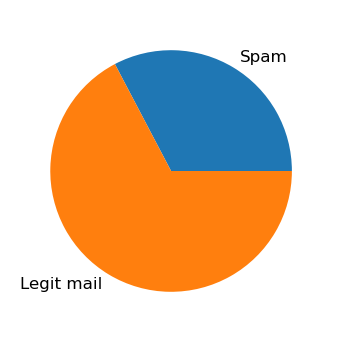

In [63]:
category_names = ['Spam' , 'Legit mail']                   
sizes = [amount_of_spam , amount_of_ham]                     
plt.figure(figsize=(2,2), dpi = 200)                      
plt.pie(sizes , labels = category_names , textprops = {'fontsize': 6})        
plt.show()

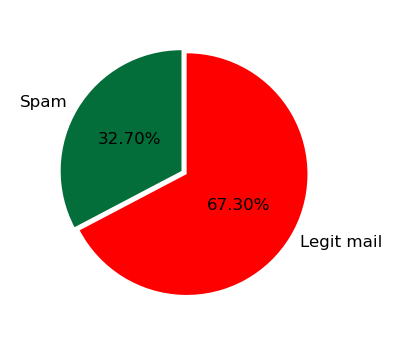

In [64]:
category_names = ['Spam' , 'Legit mail']  
custom_colors = ['#046E3A', 'red']       # ( #046E3A ) = this is a color name

sizes = [amount_of_spam , amount_of_ham]                      
plt.figure(figsize=(2,2), dpi = 200)

plt.pie(sizes , labels = category_names , textprops = {'fontsize': 6} , startangle = 90 , colors = custom_colors ,
       autopct ='%.2f%%' , pctdistance = 0.5 , explode = [0 , 0.05])

plt.show()

## donut chart

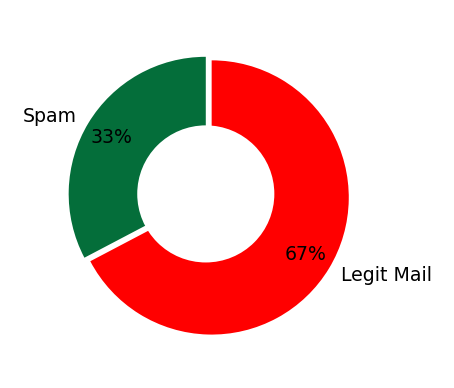

In [67]:
category_names = ['Spam', 'Legit Mail']
custom_colors = ['#046E3A', 'red'] 

sizes = [amount_of_spam, amount_of_ham]

plt.figure(figsize=(2, 2), dpi=227)

plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colors, pctdistance=0.8, explode = [0, 0.05])

centre_circle = plt.Circle((0,0), radius=0.5, fc ='white' )

plt.gca().add_artist(centre_circle)

plt.show()

# Natural Language Processing

In [69]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [70]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [98]:
data.at[5, 'MESSAGE']                      # 5 => is the row name            MESSAGE => is the column name

'A POWERHOUSE GIFTING PROGRAM You Don\'t Want To Miss! \n\n \n\n  GET IN WITH THE FOUNDERS! \n\nThe MAJOR PLAYERS are on This ONE\n\nFor ONCE be where the PlayerS are\n\nThis is YOUR Private Invitation\n\n\n\nEXPERTS ARE CALLING THIS THE FASTEST WAY \n\nTO HUGE CASH FLOW EVER CONCEIVED\n\nLeverage $1,000 into $50,000 Over and Over Again\n\n\n\nTHE QUESTION HERE IS:\n\nYOU EITHER WANT TO BE WEALTHY \n\nOR YOU DON\'T!!!\n\nWHICH ONE ARE YOU?\n\nI am tossing you a financial lifeline and for your sake I \n\nHope you GRAB onto it and hold on tight For the Ride of youR life!\n\n\n\nTestimonials\n\n\n\nHear what average people are doing their first few days:\n\n\x93We\'ve received 8,000 in 1 day and we are doing that over and over again!\' Q.S. in AL\n\n \x93I\'m a single mother in FL and I\'ve received 12,000 in the last 4 days.\x94 D. S. in FL\n\n\x93I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day!\x94 L.L. in KY\n\n\x93I didn\'t have the 

In [99]:
soup = BeautifulSoup(data.at[5, 'MESSAGE'], 'html.parser')

In [100]:
print(soup.prettify()) 

A POWERHOUSE GIFTING PROGRAM You Don't Want To Miss! 

 

  GET IN WITH THE FOUNDERS! 

The MAJOR PLAYERS are on This ONE

For ONCE be where the PlayerS are

This is YOUR Private Invitation



EXPERTS ARE CALLING THIS THE FASTEST WAY 

TO HUGE CASH FLOW EVER CONCEIVED

Leverage $1,000 into $50,000 Over and Over Again



THE QUESTION HERE IS:

YOU EITHER WANT TO BE WEALTHY 

OR YOU DON'T!!!

WHICH ONE ARE YOU?

I am tossing you a financial lifeline and for your sake I 

Hope you GRAB onto it and hold on tight For the Ride of youR life!



Testimonials



Hear what average people are doing their first few days:

We've received 8,000 in 1 day and we are doing that over and over again!' Q.S. in AL

 I'm a single mother in FL and I've received 12,000 in the last 4 days. D. S. in FL

I was not sure about this when I sent off my $1,000 pledge, but I got back $2,000 the very next day! L.L. in KY

I didn't have the money, so I found myself a partner to work this with. We have received $4,

In [101]:
def clean_msg_no_html(message, stemmer = PorterStemmer(), stop_words = set(stopwords.words('english'))):
    
    
    soup = BeautifulSoup(message, 'html.parser') 
    cleaned_text = soup.get_text()                       
    
    words = word_tokenize(cleaned_text.lower())           
    
    
    filtered_words = []
    
    for word in words:
        
    
        if word not in stop_words and word.isalpha():       
            
        
            stemmed_word = stemmer.stem(word)          
        
            filtered_words.append(stemmed_word)
        
        
    return  filtered_words

In [102]:
clean_msg_no_html('hello fishing?....How are you doing?....cleaner and cleanest')   

['hello', 'fish', 'cleaner', 'cleanest']

In [103]:
data['MESSAGE']

DOC_ID
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...
3       ##############################################...
4       I thought you might like these:\n\n1) Slim Dow...
                              ...                        
5793    http://news.bbc.co.uk/1/hi/england/2515127.stm...
5794    > >-- be careful when using this one.) Also, t...
5795    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...
5796    So then, "Mark Hammond" <mhammond@skippinet.co...
5797    Hi there,\n\n\n\nNow this is probably of no us...
Name: MESSAGE, Length: 5798, dtype: object

In [104]:
type(data['MESSAGE'])

pandas.core.series.Series

In [105]:
nested_list = data['MESSAGE'].apply(clean_msg_no_html)     
nested_list                                                     

C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\bs4\__init__.py:404: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  warnings.warn(


DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5793    [http, bizarr, collect, stuf, anim, could, fet...
5794    [care, use, one, also, realli, cute, thing, ja...
5795    [sm, skip, montanaro, write, jeremi, put, anot...
5796    [mark, hammond, like, given, zodb, sound, attr...
5797    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5798, dtype: object

In [106]:
len(nested_list)     

5798

# Nested list

In [115]:
flat_nested_list = []

for sublist in nested_list:                              
    for item in sublist:                     
        flat_nested_list.append(item)            

In [116]:
len(flat_nested_list)                   

759691

In [117]:
flat_nested_list[:10]

['save',
 'life',
 'insur',
 'spend',
 'life',
 'quot',
 'save',
 'g',
 'famili',
 'financi']

### spam and ham 

In [118]:
nested_list_spam = nested_list[data.CATEGORY == 1]     
nested_list_spam

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
1891    [want, boss, train, home, studi, thousand, peo...
1892    [messag, mime, format, prefer, doctor, order, ...
1893    [dear, subscrib, could, show, way, get, visito...
1894    [custom, appreci, sale, express, appreci, loya...
1895    [attn, strictli, confidenti, pleas, introduc, ...
Name: MESSAGE, Length: 1896, dtype: object

In [119]:
nested_list_ham = nested_list[data.CATEGORY == 0]
nested_list_ham

DOC_ID
1896    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1897    [date, wed, aug, chri, garrigu, ca, reproduc, ...
1898    [martin, post, tasso, papadopoulo, greek, scul...
1899    [martin, post, tasso, papadopoulo, greek, scul...
1900    [man, threaten, explos, moscow, thursday, augu...
                              ...                        
5793    [http, bizarr, collect, stuf, anim, could, fet...
5794    [care, use, one, also, realli, cute, thing, ja...
5795    [sm, skip, montanaro, write, jeremi, put, anot...
5796    [mark, hammond, like, given, zodb, sound, attr...
5797    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 3902, dtype: object

In [120]:
flat_list_ham = []

for sublist in nested_list_ham:
    
    for item in sublist:
        
        flat_list_ham.append(item)

In [121]:
flat_list_spam =[]

for sublist in nested_list_spam:
    
    for item in sublist:
        
        flat_list_spam.append(item)

In [122]:
len(flat_list_ham) + len(flat_list_spam)            

759691

In [123]:
len(flat_list_spam)             

317482

In [124]:
len(flat_list_ham)           

442209

In [125]:
nested_list

DOC_ID
0       [save, life, insur, spend, life, quot, save, g...
1       [fight, risk, cancer, http, slim, guarante, lo...
2       [fight, risk, cancer, http, slim, guarante, lo...
3       [adult, club, offer, free, membership, instant...
4       [thought, might, like, slim, guarante, lose, l...
                              ...                        
5793    [http, bizarr, collect, stuf, anim, could, fet...
5794    [care, use, one, also, realli, cute, thing, ja...
5795    [sm, skip, montanaro, write, jeremi, put, anot...
5796    [mark, hammond, like, given, zodb, sound, attr...
5797    [hi, probabl, use, whatsoev, also, problem, re...
Name: MESSAGE, Length: 5798, dtype: object

In [126]:
total_words = [item for sublist in nested_list for item in sublist]    

In [127]:
len(total_words)    

759691

In [128]:
email_lengths = []
 
for sublist in nested_list:                    
    
    email_lengths.append(len(sublist))  

In [129]:
email_lengths[:10]      

[92, 56, 44, 206, 45, 161, 47, 162, 203, 44]

In [130]:
max(email_lengths)         

7671

In [131]:
np.argmax(email_lengths)          

5777

In [132]:
data[5777:5780]

MESSAGE  CATEGORY  \
DOC_ID                                                                
5777    ------------------------ Yahoo! Groups Sponsor...         0   
5778    use Perl Daily Newsletter\n\n\n\nIn this issue...         0   
5779    Hi....\n\n\n\ni installed razor an SpamAssassi...         0   

                                     FILE_NAME  
DOC_ID                                          
5777    01380.e3fad5af747d3a110008f94a046bf31b  
5778    01381.044d1085f7fec8bb04229da3d7887424  
5779    01382.492cd22357b171e9cbbb2ed73f9d551f

In [133]:
data.iloc[5777, 0]                                      

'------------------------ Yahoo! Groups Sponsor ---------------------~-->\n\n4 DVDs Free +s&p Join Now\n\nhttp://us.click.yahoo.com/pt6YBB/NXiEAA/Ey.GAA/26EolB/TM\n\n---------------------------------------------------------------------~->\n\n\n\nA new version of unison is now available for testing.  It incorporates\n\nseveral small improvements over 2.9.1, but the main change is a fix to\n\na bug that had potentially serious safety consequences, but only for\n\nthe very small number of users that are in the habit of running more\n\nthan one instance of Unison at a time, in parallel.  These users are\n\nstrongly encouraged to upgrade.  Others can wait if they wish.\n\n\n\nThe release includes pre-built executables for Linux and Solaris, but\n\nnot Windows.  (We are looking for a Unison-Windows maintainer -- at\n\nthe moment, none of the active developers are regularly using Unison\n\non Windows, and we do not have a machine that is configured properly\n\nfor building executables for exp

In [135]:
data

MESSAGE  CATEGORY  \
DOC_ID                                                                
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...         1   
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
3       ##############################################...         1   
4       I thought you might like these:\n\n1) Slim Dow...         1   
...                                                   ...       ...   
5793    http://news.bbc.co.uk/1/hi/england/2515127.stm...         0   
5794    > >-- be careful when using this one.) Also, t...         0   
5795    >>>>> "SM" == Skip Montanaro <skip@pobox.com> ...         0   
5796    So then, "Mark Hammond" <mhammond@skippinet.co...         0   
5797    Hi there,\n\n\n\nNow this is probably of no us...         0   

                                     FILE_NAME  
DOC_ID                                          
0       00001.7848dde101aa985090474a91ec93fcf0  
1       00002.d94f1b97e48ed3b553b3508d116e6a09  
2       00003.2ee33bc6eacdb11f38d052c44819ba6c  
3       00004.eac8de8d759b7e74154f142194282724  
4       00005.57696a39d7d84318ce497886896bf90d  
...                                        ...  
5793    01396.61983fbe6ec43f55fd44e30fce24ffa6  
5794    01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7  
5795    01398.169b51731fe569f42169ae8f948ec676  
5796    01399.ca6b00b7b341bbde9a9ea3dd6a7bf896  
5797    01400.f897f0931e461e7b2e964d28e927c35e  

[5798 rows x 3 columns]

In [140]:
test_df = data.iloc[0:10, 0:3]
test_df    

MESSAGE  CATEGORY  \
DOC_ID                                                                
0       <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...         1   
1       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
2       1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
3       ##############################################...         1   
4       I thought you might like these:\n\n1) Slim Dow...         1   
5       A POWERHOUSE GIFTING PROGRAM You Don't Want To...         1   
6       Help wanted.  We are a 14 year old fortune 500...         1   
7       <html>\n\n<head>\n\n<title>ReliaQuote - Save U...         1   
8       TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...         1   
9       Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...         1   

                                     FILE_NAME  
DOC_ID                                          
0       00001.7848dde101aa985090474a91ec93fcf0  
1       00002.d94f1b97e48ed3b553b3508d116e6a09  
2       00003.2ee33bc6eacdb11f38d052c44819ba6c  
3       00004.eac8de8d759b7e74154f142194282724  
4       00005.57696a39d7d84318ce497886896bf90d  
5       00006.5ab5620d3d7c6c0db76234556a16f6c1  
6       00007.d8521faf753ff9ee989122f6816f87d7  
7       00008.dfd941deb10f5eed78b1594b131c9266  
8       00009.027bf6e0b0c4ab34db3ce0ea4bf2edab  
9       00010.445affef4c70feec58f9198cfbc22997

In [141]:
test_df.index =  ['A','B','C','D','E','F','G','I','J', 'L']
test_df                 

MESSAGE  CATEGORY  \
A  <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Tr...         1   
B  1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
C  1) Fight The Risk of Cancer!\n\nhttp://www.adc...         1   
D  ##############################################...         1   
E  I thought you might like these:\n\n1) Slim Dow...         1   
F  A POWERHOUSE GIFTING PROGRAM You Don't Want To...         1   
G  Help wanted.  We are a 14 year old fortune 500...         1   
I  <html>\n\n<head>\n\n<title>ReliaQuote - Save U...         1   
J  TIRED OF THE BULL OUT THERE?\n\nWant To Stop L...         1   
L  Dear ricardo1 ,\n\n\n\n<html>\n\n<body>\n\n<ce...         1   

                                FILE_NAME  
A  00001.7848dde101aa985090474a91ec93fcf0  
B  00002.d94f1b97e48ed3b553b3508d116e6a09  
C  00003.2ee33bc6eacdb11f38d052c44819ba6c  
D  00004.eac8de8d759b7e74154f142194282724  
E  00005.57696a39d7d84318ce497886896bf90d  
F  00006.5ab5620d3d7c6c0db76234556a16f6c1  
G  00007.d8521faf753ff9ee989122f6816f87d7  
I  00008.dfd941deb10f5eed78b1594b131c9266  
J  00009.027bf6e0b0c4ab34db3ce0ea4bf2edab  
L  00010.445affef4c70feec58f9198cfbc22997

In [142]:
test_df.iat[6, 2]        

'00007.d8521faf753ff9ee989122f6816f87d7'

In [143]:
test_df.at['G', 'FILE_NAME']         

'00007.d8521faf753ff9ee989122f6816f87d7'

In [144]:
test_df.iloc[6, 2]                

'00007.d8521faf753ff9ee989122f6816f87d7'

In [145]:
test_df.loc['G', 'FILE_NAME']                  

'00007.d8521faf753ff9ee989122f6816f87d7'

In [146]:
test_df.index.get_loc('L')                     

9

# Programe start

In [147]:
unique_words = pd.Series(flat_nested_list).value_counts()    
unique_words                                    

http         10663
use           5022
list          4852
email         4368
get           4201
             ...  
aspers           1
zoppi            1
spinmeist        1
deneb            1
oreilli          1
Length: 27332, dtype: int64

In [148]:
frequent_words = unique_words[:2500]        
frequent_words

http         10663
use           5022
list          4852
email         4368
get           4201
             ...  
asian           44
overnight       43
analog          43
steven          43
liquid          43
Length: 2500, dtype: int64

In [149]:
frequent_words.index                          

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'ximian', 'con', 'dedic', 'pleasur', 'capitalist', 'asian', 'overnight',
       'analog', 'steven', 'liquid'],
      dtype='object', length=2500)

In [150]:
vocab = pd.DataFrame({'VOCAB_WORD':frequent_words.index })     
vocab

VOCAB_WORD
0          http
1           use
2          list
3         email
4           get
...         ...
2495      asian
2496  overnight
2497     analog
2498     steven
2499     liquid

[2500 rows x 1 columns]

In [151]:
vocab.index.name = 'WORD_ID'                  
vocab

VOCAB_WORD
WORD_ID           
0             http
1              use
2             list
3            email
4              get
...            ...
2495         asian
2496     overnight
2497        analog
2498        steven
2499        liquid

[2500 rows x 1 columns]

In [152]:
WORD_ID_FILE = 'SpamData/01_Processing/word-by-id.csv'                                     
vocab.to_csv(WORD_ID_FILE, index_label = vocab.index.name, header = vocab.VOCAB_WORD.name)

In [153]:
vocab.VOCAB_WORD == 'yestee antony' 

WORD_ID
0       False
1       False
2       False
3       False
4       False
        ...  
2495    False
2496    False
2497    False
2498    False
2499    False
Name: VOCAB_WORD, Length: 2500, dtype: bool

In [154]:
any(vocab.VOCAB_WORD == 'yestee antony') 

False

In [155]:
any(vocab.VOCAB_WORD == 'steven')

True

In [156]:
'YESTEE ANTONY' in set(vocab.VOCAB_WORD)

False

In [157]:
'steven' in set(vocab.VOCAB_WORD)

True

In [158]:
example_nested_list = [['Apple', 'Orange', 'Apricot'],['Brinjal', 'Beans','cabbage']]

In [159]:
pd.DataFrame.from_records(example_nested_list)

0       1        2
0    Apple  Orange  Apricot
1  Brinjal   Beans  cabbage

In [160]:
type(nested_list)

pandas.core.series.Series

In [161]:
nested_list_after_tolist = nested_list.tolist() 

In [162]:
nested_list_after_tolist            

[['save',
  'life',
  'insur',
  'spend',
  'life',
  'quot',
  'save',
  'g',
  'famili',
  'financi',
  'secur',
  'import',
  'life',
  'quot',
  'save',
  'ke',
  'buy',
  'life',
  'insur',
  'simpl',
  'afford',
  'provid',
  'free',
  'access',
  'best',
  'compani',
  'lowest',
  'rate',
  'life',
  'quot',
  'save',
  'fast',
  'save',
  'money',
  'let',
  'us',
  'help',
  'get',
  'start',
  'best',
  'ue',
  'countri',
  'new',
  'coverag',
  'save',
  'hundr',
  'even',
  'usand',
  'dollar',
  'request',
  'free',
  'quot',
  'lifequot',
  'save',
  'servic',
  'take',
  'less',
  'minut',
  'complet',
  'shop',
  'compar',
  'save',
  'type',
  'life',
  'insur',
  'click',
  'free',
  'quot',
  'protect',
  'famili',
  'best',
  'invest',
  'r',
  'make',
  'receipt',
  'email',
  'error',
  'wish',
  'remov',
  'list',
  'pleas',
  'click',
  'type',
  'remov',
  'resid',
  'state',
  'prohibit',
  'solicit',
  'ce',
  'pleas',
  'disregard',
  'email'],
 ['fight',
  

In [163]:
word_columns_df = pd.DataFrame.from_records(nested_list_after_tolist)
word_columns_df

0        1          2         3           4         5        6     \
0        save     life      insur     spend        life      quot     save   
1       fight     risk     cancer      http        slim  guarante     lose   
2       fight     risk     cancer      http        slim  guarante     lose   
3       adult     club      offer      free  membership   instant   access   
4     thought    might       like      slim    guarante      lose       lb   
...       ...      ...        ...       ...         ...       ...      ...   
5793     http   bizarr    collect      stuf        anim     could    fetch   
5794     care      use        one      also      realli      cute    thing   
5795       sm     skip  montanaro     write      jeremi       put    anoth   
5796     mark  hammond       like     given        zodb     sound  attract   
5797       hi  probabl        use  whatsoev        also   problem   regard   

         7         8        9     ...  7661  7662  7663  7664  7665  7666  \
0           g    famili  financi  ...  None  None  None  None  None  None   
1          lb       day     http  ...  None  None  None  None  None  None   
2          lb       day     http  ...  None  None  None  None  None  None   
3        site      user     name  ...  None  None  None  None  None  None   
4         day      http    fight  ...  None  None  None  None  None  None   
...       ...       ...      ...  ...   ...   ...   ...   ...   ...   ...   
5793     sold   cornwal   museum  ...  None  None  None  None  None  None   
5794  japanes        av     girl  ...  None  None  None  None  None  None   
5795      way  interest     hear  ...  None  None  None  None  None  None   
5796    would    packag    hundr  ...  None  None  None  None  None  None   
5797   nvidia       two   machin  ...  None  None  None  None  None  None   

      7667  7668  7669  7670  
0     None  None  None  None  
1     None  None  None  None  
2     None  None  None  None  
3     None  None  None  None  
4     None  None  None  None  
...    ...   ...   ...   ...  
5793  None  None  None  None  
5794  None  None  None  None  
5795  None  None  None  None  
5796  None  None  None  None  
5797  None  None  None  None  

[5798 rows x 7671 columns]

In [1]:
### it show  5798 rows   &    7671 columns
###  total number of mails = 5798
### 7671 = The biggest mail contain 7671 words (only for this data) ,each word is in seperate column thats why the shape of the 
### dataframe is 5798 rows × 7671 columns
### None is showing most of the column because there are no words ..... 

In [164]:
word_columns_df.shape

(5798, 7671)

In [165]:
X_train, X_test, y_train, y_test = train_test_split(word_columns_df, data.CATEGORY, test_size = 0.3, random_state = 42)

## x_train => trainig value(words)------ y_train => label value of x_train (0..or..1)
## x_test => testing value(words)-------y_test => label value of x_test (0..or..1)

In [166]:
X_train.head()

0       1        2       3       4          5          6     \
4695     anyon  experi      use   digit  camera      linux      think   
2615    destin     new  realiti      tv    show  anarchist       hunt   
5071       thu     jul  matthia    saou   wrote       upon       time   
1293   tremend    save    toner  inkjet     fax    thermal  replenish   
4356  forteana    jayn     ayri   wrote   think     letter         oh   

         7      8       9     ...  7661  7662  7663  7664  7665  7666  7667  \
4695      buy    one  camera  ...  None  None  None  None  None  None  None   
2615     rais  polic     ire  ...  None  None  None  None  None  None  None   
5071  matthia  wrote     see  ...  None  None  None  None  None  None  None   
1293    toner     go  secret  ...  None  None  None  None  None  None  None   
4356    right   give      go  ...  None  None  None  None  None  None  None   

      7668  7669  7670  
4695  None  None  None  
2615  None  None  None  
5071  None  None  None  
1293  None  None  None  
4356  None  None  None  

[5 rows x 7671 columns]

In [167]:
X_test.head()

0         1        2         3        4              5       6     \
3734     url      http     date    suppli    carni  concessionair   taken   
1103    take   control   confer      call  crystal          clear  confer   
812    money  merchant  account      busi    start            new    busi   
1632    fork      free     porn  password     free           porn  access   
1128  messag      mime   format     gener     lead            use    roth   

           7         8      9     ...  7661  7662  7663  7664  7665  7666  \
3734       sell    twinki    big  ...  None  None  None  None  None  None   
1103  callsonli      cent    per  ...  None  None  None  None  None  None   
812        know    someon    abl  ...  None  None  None  None  None  None   
1632       porn     handl   want  ...  None  None  None  None  None  None   
1128    convers  postcard  everi  ...  None  None  None  None  None  None   

      7667  7668  7669  7670  
3734  None  None  None  None  
1103  None  None  None  None  
812   None  None  None  None  
1632  None  None  None  None  
1128  None  None  None  None  

[5 rows x 7671 columns]

In [168]:
X_train.index.name = y_train.index.name = 'DOC_ID' 
X_test.index.name = y_test.index.name='DOC_ID'

In [169]:
X_test.head()

0         1        2         3        4              5       6     \
DOC_ID                                                                        
3734       url      http     date    suppli    carni  concessionair   taken   
1103      take   control   confer      call  crystal          clear  confer   
812      money  merchant  account      busi    start            new    busi   
1632      fork      free     porn  password     free           porn  access   
1128    messag      mime   format     gener     lead            use    roth   

             7         8      9     ...  7661  7662  7663  7664  7665  7666  \
DOC_ID                              ...                                       
3734         sell    twinki    big  ...  None  None  None  None  None  None   
1103    callsonli      cent    per  ...  None  None  None  None  None  None   
812          know    someon    abl  ...  None  None  None  None  None  None   
1632         porn     handl   want  ...  None  None  None  None  None  None   
1128      convers  postcard  everi  ...  None  None  None  None  None  None   

        7667  7668  7669  7670  
DOC_ID                          
3734    None  None  None  None  
1103    None  None  None  None  
812     None  None  None  None  
1632    None  None  None  None  
1128    None  None  None  None  

[5 rows x 7671 columns]

In [170]:
X_test.tail()

0        1        2        3       4        5     6       7     \
DOC_ID                                                                     
2227    articl  support  fantasi    irvin  center  univers   got  corner   
5708    messag    notif  postfix  program    host     warn  need  resend   
5122    messag  dimebox      hal    devor   write      wed   jul    chri   
1338    messag     mime   format     home    sale     list    us     buy   
5040     craig     said      hmm   tricki     got     roll   one    rule   

           8        9     ...  7661  7662  7663  7664  7665  7666  7667  7668  \
DOC_ID                    ...                                                   
2227     electr      car  ...  None  None  None  None  None  None  None  None   
5708     messag   messag  ...  None  None  None  None  None  None  None  None   
5122       chri  garrigu  ...  None  None  None  None  None  None  None  None   
1338       home   import  ...  None  None  None  None  None  None  None  None   
5040    probabl    break  ...  None  None  None  None  None  None  None  None   

        7669  7670  
DOC_ID              
2227    None  None  
5708    None  None  
5122    None  None  
1338    None  None  
5040    None  None  

[5 rows x 7671 columns]

In [171]:
y_train        

DOC_ID
4695    0
2615    0
5071    0
1293    1
4356    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4058, dtype: int64

In [172]:
y_test.tail()

DOC_ID
2227    0
5708    0
5122    0
1338    1
5040    0
Name: CATEGORY, dtype: int64

In [173]:
vocab

VOCAB_WORD
WORD_ID           
0             http
1              use
2             list
3            email
4              get
...            ...
2495         asian
2496     overnight
2497        analog
2498        steven
2499        liquid

[2500 rows x 1 columns]

In [175]:
vocab.at[2499, 'VOCAB_WORD']

'liquid'

In [177]:
word_index = pd.Index(vocab.VOCAB_WORD)        
word_index

Index(['http', 'use', 'list', 'email', 'get', 'mail', 'one', 'free', 'time',
       'work',
       ...
       'ximian', 'con', 'dedic', 'pleasur', 'capitalist', 'asian', 'overnight',
       'analog', 'steven', 'liquid'],
      dtype='object', name='VOCAB_WORD', length=2500)

In [178]:
word_index.get_loc('analog')

2497

In [179]:
word_index.get_loc('http')

0

In [180]:
X_train

0       1         2       3         4          5          6     \
DOC_ID                                                                       
4695       anyon  experi       use   digit    camera      linux      think   
2615      destin     new   realiti      tv      show  anarchist       hunt   
5071         thu     jul   matthia    saou     wrote       upon       time   
1293     tremend    save     toner  inkjet       fax    thermal  replenish   
4356    forteana    jayn      ayri   wrote     think     letter         oh   
...          ...     ...       ...     ...       ...        ...        ...   
3772         url    http      date     tue       sep        gmt   overwork   
5191        date     tue       aug    ever       tri        get         mh   
5226         tom    said  question   becom  knowledg      share  difficult   
5390         aug    gari   lawrenc  murphi     wrote     restat     assert   
860          see    exit    inform    dear    friend     discov       five   

            7       8         9     ...  7661  7662  7663  7664  7665  7666  \
DOC_ID                              ...                                       
4695         buy     one    camera  ...  None  None  None  None  None  None   
2615        rais   polic       ire  ...  None  None  None  None  None  None   
5071     matthia   wrote       see  ...  None  None  None  None  None  None   
1293       toner      go    secret  ...  None  None  None  None  None  None   
4356       right    give        go  ...  None  None  None  None  None  None   
...          ...     ...       ...  ...   ...   ...   ...   ...   ...   ...   
3772       world     web   develop  ...  None  None  None  None  None  None   
5191     sequenc     hmm       use  ...  None  None  None  None  None  None   
5226       thing   organ      owen  ...  None  None  None  None  None  None   
5390     clarifi  govern  restrain  ...  None  None  None  None  None  None   
860     internet    busi       set  ...  None  None  None  None  None  None   

        7667  7668  7669  7670  
DOC_ID                          
4695    None  None  None  None  
2615    None  None  None  None  
5071    None  None  None  None  
1293    None  None  None  None  
4356    None  None  None  None  
...      ...   ...   ...   ...  
3772    None  None  None  None  
5191    None  None  None  None  
5226    None  None  None  None  
5390    None  None  None  None  
860     None  None  None  None  

[4058 rows x 7671 columns]

In [181]:
X_train.iat[0,1]

'experi'

In [182]:
word_index.get_loc('experi')         

317

In [183]:
word_index.get_loc(X_train.iat[0,1])

317

In [184]:
y_train

DOC_ID
4695    0
2615    0
5071    0
1293    1
4356    0
       ..
3772    0
5191    0
5226    0
5390    0
860     1
Name: CATEGORY, Length: 4058, dtype: int64

In [185]:
X_train.index[0]                                  

4695

In [186]:
y_train[4844]                                            

0

In [187]:
OCCURRENCE = 1

In [188]:
word_index.get_loc('ye')                        

265

In [189]:
X_train.iat[1,2]

'realiti'

In [190]:
def make_sparse_matrix(df, indexed_words, labels):
    
    nr_rows = df.shape[0]                          
    
    nr_cols = df.shape[1]
                                                     
    word_set = set(indexed_words)
                                                              
    dict_list = []                                        
                                                   
    for i in range(nr_rows):
        
        for j in range(nr_cols):
            
            word = df.iat[i,j]
            
            if word in word_set:
                
                doc_id = df.index[i]
                
                word_id = indexed_words.get_loc(word)
                
                category = labels.at[doc_id]
                
                item = {'LABEL': category, 'DOC_ID': doc_id, 'OCCURRENCE': 1, 'WORD_ID': word_id}
                
                dict_list.append(item)
                
    return pd.DataFrame(dict_list)               

In [191]:
sparse_train_df = make_sparse_matrix(X_train, word_index, y_train)
sparse_train_df

LABEL  DOC_ID  OCCURRENCE  WORD_ID
0           0    4695           1      148
1           0    4695           1      317
2           0    4695           1        1
3           0    4695           1      608
4           0    4695           1     1760
...       ...     ...         ...      ...
429324      1     860           1       47
429325      1     860           1     1434
429326      1     860           1       26
429327      1     860           1       21
429328      1     860           1      126

[429329 rows x 4 columns]

In [192]:
train_grouped = sparse_train_df.groupby(['DOC_ID','WORD_ID','LABEL']).sum() 
train_grouped

OCCURRENCE
DOC_ID WORD_ID LABEL            
0      2       1               1
       3       1               2
       4       1               1
       7       1               3
       11      1               1
...                          ...
5797   2031    0               1
       2035    0               2
       2249    0               1
       2347    0               1
       2374    0               1

[259350 rows x 1 columns]

In [193]:
train_grouped = train_grouped.reset_index()
train_grouped                          

DOC_ID  WORD_ID  LABEL  OCCURRENCE
0            0        2      1           1
1            0        3      1           2
2            0        4      1           1
3            0        7      1           3
4            0       11      1           1
...        ...      ...    ...         ...
259345    5797     2031      0           1
259346    5797     2035      0           2
259347    5797     2249      0           1
259348    5797     2347      0           1
259349    5797     2374      0           1

[259350 rows x 4 columns]

In [194]:
TRAINING_DATA_FILE = 'SpamData/02_Training/train-data.txt'
np.savetxt(TRAINING_DATA_FILE, train_grouped, fmt='%d')     

In [195]:
sparse_test_df = make_sparse_matrix(X_test, word_index, y_test)
sparse_test_df

LABEL  DOC_ID  OCCURRENCE  WORD_ID
0           0    3734           1      109
1           0    3734           1        0
2           0    3734           1       76
3           0    3734           1      339
4           0    3734           1      690
...       ...     ...         ...      ...
203377      0    5040           1      130
203378      0    5040           1      107
203379      0    5040           1      161
203380      0    5040           1       53
203381      0    5040           1      811

[203382 rows x 4 columns]

In [196]:
test_grouped = sparse_test_df.groupby(['DOC_ID', 'WORD_ID', 'LABEL']).sum().reset_index()
test_grouped

DOC_ID  WORD_ID  LABEL  OCCURRENCE
0            8        2      1           1
1            8        3      1           4
2            8        4      1           2
3            8        5      1           1
4            8        6      1           2
...        ...      ...    ...         ...
116874    5792     1346      0           1
116875    5792     1586      0           1
116876    5792     1668      0           1
116877    5792     2078      0           1
116878    5792     2178      0           1

[116879 rows x 4 columns]

In [197]:
TEST_DATA_FILE = 'SpamData/02_Training/test-data.txt'
np.savetxt(TEST_DATA_FILE, test_grouped, fmt='%d')

In [198]:
len(X_test)

1740

In [199]:
len(X_train)

4058

In [200]:
len(test_grouped.DOC_ID.unique())

1725

In [201]:
no_of_test_mails_lost = len(X_test) - len(test_grouped.DOC_ID.unique())
no_of_test_mails_lost 

15

In [202]:
no_of_train_mails_lost = len(X_train) - len(train_grouped.DOC_ID.unique())
no_of_train_mails_lost 

44

In [203]:
set(X_test.index) - set(test_grouped.DOC_ID.unique())

{134, 179, 240, 274, 298, 339, 439, 471, 670, 734, 765, 945, 1544, 1670, 1700}

In [204]:
data.MESSAGE[134]

'------=_NextPart_000_00E8_85C13B1D.B7243B86\n\nContent-Type: text/html; charset="iso-8859-1"\n\nContent-Transfer-Encoding: base64\n\n\n\n\n\nPGh0bWw+DQoNCjxib2R5IGJnY29sb3I9IiNGRkZGRkYiIHRleHQ9IiMwMDAw\n\nMDAiPiANCjxwIGFsaWduPSJjZW50ZXIiPjxhIGhyZWY9Imh0dHA6Ly93d3cu\n\nZGlyZWN0d2Vic3RvcmUuY29tL3RveXMvaW5kZXguaHRtbCI+PGltZyBzcmM9\n\nImh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL21waWMuanBnIiB3aWR0\n\naD0iNTAwIiBoZWlnaHQ9IjMzOSIgYm9yZGVyPSIwIj48L2E+PGJyPiANCjxm\n\nb250IHNpemU9IjMiIGZhY2U9IkFyaWFsLCBIZWx2ZXRpY2EsIHNhbnMtc2Vy\n\naWYiPjxhIGhyZWY9Imh0dHA6Ly93d3cuZGlyZWN0d2Vic3RvcmUuY29tL3Rv\n\neXMvaW5kZXguaHRtbCI+PGI+RU5URVIgDQpOT1cgaWYgeW91IGFyZSAxOCBh\n\nbmQgb3ZlcjwvYj48L2E+PC9mb250PjwvcD4gDQo8cCBhbGlnbj0iY2VudGVy\n\nIj48Zm9udCBmYWNlPSJBcmlhbCwgSGVsdmV0aWNhLCBzYW5zLXNlcmlmIiBz\n\naXplPSI0IiBjb2xvcj0iI0ZGMDAwMCI+PGI+U1BFQ0lBTCANCk9GRkVSPGJy\n\nPiANCjxmb250IHNpemU9IjUiPjMwIERheXMgPGk+RlJFRSBhY2Nlc3M8L2k+\n\nIDwvZm9udD48YnI+IA0KdG8gdGhlIGxhcmdlc3QgQWR1bHRzaXRlIG9uIHRo\n\nZSB3ZWIuPGJyPiANCjwvYj4gPG

In [205]:
clean_msg_no_html(data.MESSAGE[134])

[]

In [206]:
data.loc[134]

MESSAGE      ------=_NextPart_000_00E8_85C13B1D.B7243B86\n\...
CATEGORY                                                     1
FILE_NAME               00135.00e388e3b23df6278a8845047ca25160
Name: 134, dtype: object

In [207]:
file_number_135 = 'SpamData/01_Processing/spam_assassin_corpus/spam_1/00135.00e388e3b23df6278a8845047ca25160'

In [208]:
file_number_135_stream = open(file_number_135)
message_135 = file_number_135_stream.read()
file_number_135_stream.close()
print(message_135)

From new_adult_toys_0463b54@yahoo.com  Wed Aug 28 11:04:02 2002
Return-Path: <new_adult_toys_0463b54@yahoo.com>
Delivered-To: zzzz@localhost.spamassassin.taint.org
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 32C7943F99
	for <zzzz@localhost>; Wed, 28 Aug 2002 06:03:57 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Wed, 28 Aug 2002 11:03:57 +0100 (IST)
Received: from yahoo.com (IDENT:squid@[211.57.23.142]) by
    dogma.slashnull.org (8.11.6/8.11.6) with SMTP id g7RJLTZ22353 for
    <webmaster@efi.ie>; Tue, 27 Aug 2002 20:21:30 +0100
Received: from 144.60.76.182 ([144.60.76.182]) by smtp4.cyberecschange.com
    with SMTP; 28 Aug 0102 14:16:34 -0100
Received: from pet.vosni.net ([179.59.188.175]) by
    smtp-server.tampabayr.com with smtp; 28 Aug 0102 13:11:42 -0900
Received: from 179.125.241.6 ([179.125.241.6]) by smtp-server1.cflrr.com
    with a